## Full Name: Mahdi Salahshour
## Student ID: 99101727


# Introduction

In this practical assignment, we will practice using PyTorch to implement neural networks. We will work with the Fashion-MNIST dataset, and after visualizing the data to get familiar with it, we will use t-SNE and implement the PCA algorithm to reduce the dimensionality of the data for visualization in a 2D plot.

## Tasks

1. Implement the PCA algorithm.
2. Apply PCA and t-SNE to the Fashion-MNIST test set.
3. Train a simple stacked autoencoder consisting of several MLP layers.
4. Use PCA and t-SNE to visualize the encoding of the test set calculated by the trained autoencoder.
5. Add a classification layer on top of the autoencoder's encoder and use its trained weights to predict each image label.

## Instructions

1. For task 1, you can use the following steps:

    a. Import the necessary libraries.
    b. Define the PCA class.
    c. Instantiate the PCA class and fit it to the Fashion-MNIST test set.
    d. Transform the Fashion-MNIST test set using the fitted PCA model.

2. For task 2, you can use the following steps:

    a. Import the necessary libraries.
    b. Instantiate the PCA and t-SNE classes.
    c. Transform the Fashion-MNIST test set using the PCA model.
    d. Transform the PCA-transformed Fashion-MNIST test set using the t-SNE model.
    e. Visualize the t-SNE-transformed Fashion-MNIST test set using a scatter plot.

3. For task 3, you can use the following steps:

    a. Import the necessary libraries.
    b. Define the stacked autoencoder class.
    c. Instantiate the stacked autoencoder class and train it on the Fashion-MNIST training set.

4. For task 4, you can use the following steps:

    a. Transform the Fashion-MNIST test set using the PCA model.
    b. Transform the PCA-transformed Fashion-MNIST test set using the trained autoencoder's encoder.
    c. Visualize the t-SNE-transformed encoding of the Fashion-MNIST test set using a scatter plot.

5. For task 5, you can use the following steps:

    a. Import the necessary libraries.
    b. Define the classification layer class.
    c. Add the classification layer to the trained autoencoder's encoder.
    d. Train the classification layer on the Fashion-MNIST training set.
    e. Evaluate the classification layer on the Fashion-MNIST test set.

## Conclusion

In this practical assignment, we have learned how to use PyTorch to implement neural networks and apply dimensionality reduction techniques to data visualization. We have also learned how to train and evaluate classification models.


# Import Requirements

In [35]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from random import sample

# Config

In [36]:
RANDOM_STATE = 42
random.seed(RANDOM_STATE)

In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Load Fashion MNIST Dataset

In [38]:
fashion_mnist = fetch_openml(name='Fashion-MNIST')

X, y = fashion_mnist.data.astype('float32'), fashion_mnist.target.astype('int')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [39]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress",
    "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [40]:
print(X.shape)

(70000, 784)


In [41]:
print(y.shape)

(70000,)


In [42]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.1, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.075, random_state=RANDOM_STATE)

print(f'Shape of Training Data: {X_train.shape}')
print(f'Shape of Test Data: {X_test.shape}')
print(f'Shape of Validation Data: {X_val.shape}')

Shape of Training Data: (58275, 784)
Shape of Test Data: (7000, 784)
Shape of Validation Data: (4725, 784)


# Visualization

In [43]:
def visualize_one_image_per_category(X, y, class_names):
    unique_labels = np.unique(y)
    fig, ax = plt.subplots(1, len(unique_labels), figsize=(20, 4))

    for i, label in enumerate(unique_labels):
        # Find the first image for the current label
        image_idx = np.where(y == label)[0][0]
        image = X.iloc[image_idx].values.reshape(28, 28)  # Use .iloc to access by index

        ax[i].imshow(image, cmap='gray')
        ax[i].set_title(class_names[label])
        ax[i].axis('off')

    plt.show()

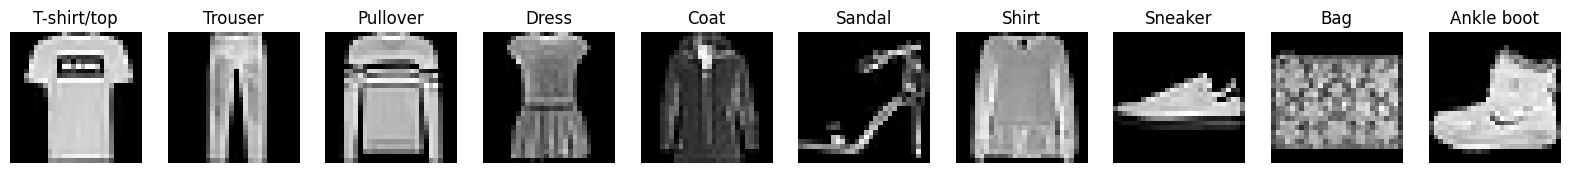

In [44]:
visualize_one_image_per_category(X, y, class_names)


# Dimensionality Reduction

In [45]:
def visualize_2d(reduced_data, labels, method='PCA', class_names=class_names):
    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='tab10', alpha=0.5, s=5)
    plt.title(f'{method} Visualization')
    plt.xlabel(f'{method} Component 1')
    plt.ylabel(f'{method} Component 2')

    plt.colorbar(scatter, ticks=np.arange(len(class_names)), label='Class',
                 format=plt.FuncFormatter(lambda val, loc: class_names[int(val)]))

    for i, label in enumerate(class_names):
        indices = labels == i
        plt.text(reduced_data[indices, 0].mean(), reduced_data[indices, 1].mean(),
                 label, fontsize=10, ha='center', va='center')

    plt.show()

#### For this part and the following part, apply PCA and t-SNE to test dataset, respectively.

## PCA (10 points)

### Principal Component Analysis (PCA) - Step-by-Step Explanation

Principal Component Analysis (PCA) is a technique used for dimensionality reduction and data visualization. It aims to transform a dataset into a new coordinate system (a lower-dimensional space) while retaining the most important information.

1. **Center the Data**:
   - Calculate the mean of each feature in the dataset.
   - Subtract the mean from each feature value to center the data around the origin. This ensures that the new coordinate system is centered at the origin.

2. **Calculate Covariance Matrix**:
   - Compute the covariance matrix for the centered data.
   - The covariance matrix provides information about how features vary with each other.

3. **Calculate Eigenvectors and Eigenvalues**:
   - Compute the eigenvectors and eigenvalues of the covariance matrix.
   - Eigenvectors represent the directions of maximum variance, and eigenvalues quantify the amount of variance in those directions.

4. **Sort Eigenvectors**:
   - Sort the eigenvectors based on their corresponding eigenvalues in descending order.
   - The eigenvectors with higher eigenvalues capture more variance and are prioritized.

5. **Select Principal Components**:
   - Choose the top `n` eigenvectors (principal components) based on the desired number of dimensions for the reduced dataset.
   - These eigenvectors represent the directions in the original feature space that capture the most variance.

6. **Project Data**:
   - Project the centered data onto the lower-dimensional subspace formed by the selected principal components.
   - Multiply the centered data by the selected eigenvectors to obtain the new representation in the lower-dimensional space.

7. **Transform the Original Data:**:
   - Multiply the original data by the projection matrix to obtain the new lower-dimensional representation of the data.




PCA helps in reducing the dimensionality of the dataset while retaining the most critical information. The first few principal components capture the majority of the variance, allowing for effective visualization and analysis of the data in a lower-dimensional space.


In [46]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.eigenvectors = None
        self.mean = None

    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # Calculate the covariance matrix
        cov = np.cov(X.T)
        # Calculate the eigenvectors and eigenvalues of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # Sort eigenvectors based on eigenvalues in descending order
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        self.eigenvectors = eigenvectors[:,idx]
        # Select the top n eigenvectors (principal components)
        self.eigenvectors = self.eigenvectors[:, :self.n_components]

    def transform(self, X):
        # Center the data
        X = X - self.mean

        # Project the data onto the lower-dimensional subspace
        return np.dot(X, self.eigenvectors)

    def fit_transform(self, X):
        # Fit, then transform :)
        self.fit(X)
        return self.transform(X)




## Apply `PCA` and `t-SNE` to the testset.

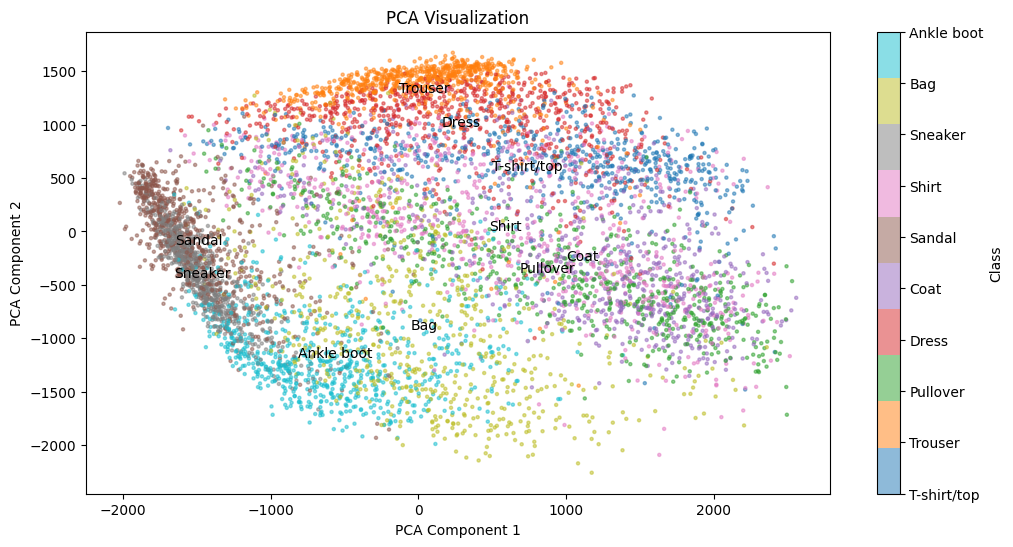

In [47]:
pca = PCA(2)
X_pca = pca.fit_transform(X_test)
visualize_2d(X_pca, y_test, 'PCA')

## t-SNE

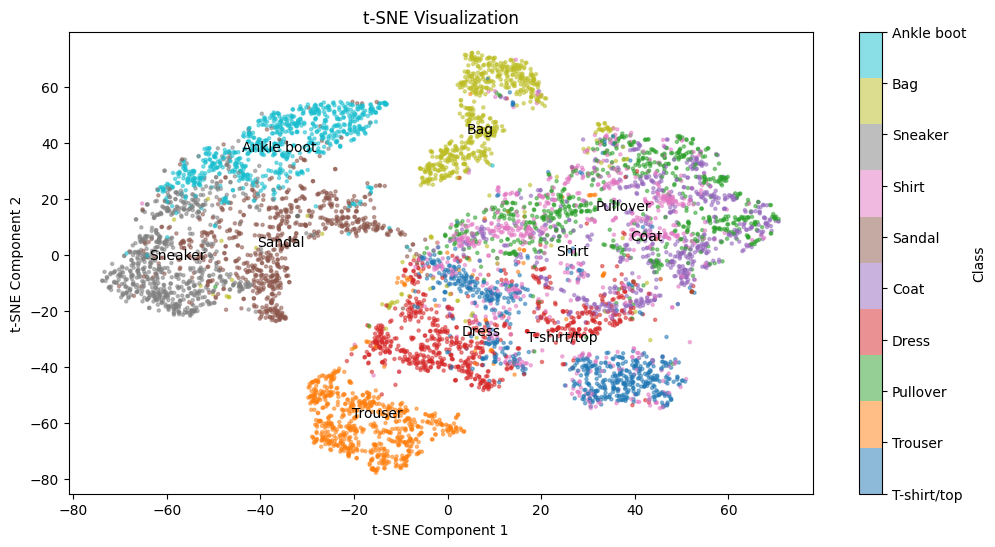

In [48]:
tsne = TSNE(n_components=2, random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X_test)
visualize_2d(X_tsne, y_test, 't-SNE')

## **Question:** (10 points)

- Explain the differences between PCA (Principal Component Analysis) and t-SNE (t-distributed Stochastic Neighbor Embedding) in terms of their preservation of distance, handling of non-linearity, and preservation of data structure. How does each technique aim to maintain distance or similarity relationships between data points in the lower-dimensional space, handle non-linear relationships in the data, and preserve the global or local data structure? Provide examples or illustrations to support your explanation.

## Solution:
PCA and t-SNE are two popular dimensionality reduction techniques that have different goals and methods. Here is a brief comparison of their main features:

- Preservation of distance: PCA preserves the Euclidean distance between data points in the original and lower-dimensional space, which means that it tries to keep the relative positions of the points as close as possible. t-SNE preserves the probability distribution of the distances between data points in the original and lower-dimensional space, which means that it tries to keep the similarity of the points as close as possible. For example, if two points are very close in the original space, they should have a high probability of being close in the lower-dimensional space, and vice versa. This also implies that t-SNE is more sensitive to the scale of the data than PCA, and may require normalization or standardization before applying the technique.

- Handling of non-linearity: PCA is a linear technique that assumes that the data lies on or near a linear subspace. This means that it can capture the directions of maximum variance in the data, but it may fail to capture the non-linear relationships or patterns that exist in the data. t-SNE is a non-linear technique that does not make any assumptions about the structure of the data. This means that it can capture the non-linear relationships or patterns that exist in the data, but it may also distort the linear relationships or patterns that exist in the data.

- Preservation of data structure: PCA preserves the global structure of the data, which means that it tries to capture the overall shape and distribution of the data. This can be useful for identifying the main components or factors that explain the variance in the data, or for finding outliers or anomalies in the data. t-SNE preserves the local structure of the data, which means that it tries to capture the clusters or groups of similar data points. This can be useful for visualizing the data and discovering the hidden categories or classes in the data, or for finding similarities or differences between data points.

- Examples: if we compare results of applying PCA and t-SNE to the MNIST dataset, which consists of 28x28 pixel images of handwritten digits from 0 to 9. The original data has 784 dimensions, and the reduced data has 2 dimensions. The colors represent the labels of the digits. PCA preserves the global structure of the data, but it also mixes up some of the digits that have similar shapes, such as 4 and 9, or 3 and 5. t-SNE preserves the local structure of the data, but it also separates some of the digits that have different shapes, such as 1 and 7, or 2 and 6. t-SNE also creates some gaps or spaces between the clusters, which may not reflect the true density of the data.




# Deep Auto-Encoder For Representation Learning

In the previous section, you observed the results of applying two renowned dimensionality reduction techniques to the data. Additionally, a representation of the data can be learned by an **autoencoder**, which is a neural network that takes an image (or a noisy version of it) as input and attempts to reconstruct the image after encoding the pixels.

## Create Dataset & Datalodaer (5 points)

- Note: If you are unfamiliar with PyTorch's `Dataset`, `Transforms`, and `Dataloader` modules, consult the following link for assistance: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [49]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

class CustomFashionMNISTDataset(Dataset):
    def __init__(self, X, y, transform):
        self.X = X
        self.y = y
        self.transform = transform


    def __len__(self):
        return len(self.X)



    def __getitem__(self, index):
        image, label = self.X[index].reshape(1,28* 28).astype(np.uint8),self.y[index]
        if self.transform :
            image = self.transform(image)
        return image, label


BATCH_SIZE = 64

train_transform = transforms.Compose(
    [transforms.ToTensor()],
)

test_transform = transforms.Compose(
    [transforms.ToTensor()],
)

train_dataset = CustomFashionMNISTDataset(X_train, y_train, train_transform)
val_dataset = CustomFashionMNISTDataset(X_val, y_val, test_transform)
test_dataset = CustomFashionMNISTDataset(X_test, y_test, test_transform)


train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

## Define Model (5 points)

**Caution:** You may only use multilayer perceptron (MLP) layers.

- Note: If you are unfamiliar with custom models using PyTorch, consult the following link for assistance:
https://pytorch.org/tutorials/beginner/examples_nn/polynomial_module.html

In [50]:
import torch.nn.functional as F
from torch import nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(True),
            nn.Linear(256, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 32),
            nn.ReLU(True),
            nn.Linear(32, 16),
            nn.ReLU(True),
            nn.Linear(16, 8)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(True),
            nn.Linear(16, 32),
            nn.ReLU(True),
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 28 * 28),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
autoencoder = Autoencoder()
autoencoder.to(device)


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU(inplace=True)
    (8): Linear(in_features=32, out_features=16, bias=True)
    (9): ReLU(inplace=True)
    (10): Linear(in_features=16, out_features=8, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=32, out_features=64, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): ReLU(inplace=True)
    (8): Linear(in_features=128, out_features=256, bias=True)
    (9): ReLU(

## Trainin Loop (10 points)

#### Complete the `train_at_epoch`, `test_ae`, and `train_ae` functions.

#### Define your `Optimizer`, `Learning Rate Scheduler`, and `Criterion` inside the `train_ae` function.


In [51]:
from torch import optim

def train_ae_epoch(model, train_loader, criterion, optimizer, scheduler, device):
    model.train()
    running_loss = 0.0
    for data, _ in train_loader:
        data = data.view(data.size(0), -1).to(device)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, data)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * data.size(0)
    scheduler.step()
    mean_loss = running_loss / len(train_loader.dataset)
    return mean_loss

def test_ae(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.view(data.size(0), -1).to(device)
            outputs = model(data)
            loss = criterion(outputs, data)
            running_loss += loss.item() * data.size(0)
    mean_loss = running_loss / len(test_loader.dataset)
    return mean_loss

def train_ae(model, train_loader, val_loader, num_epochs, device=device):
    learning_rate = 0.001
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
    train_loss_history = []
    val_loss_history = []

    for epoch in range(num_epochs):
        train_loss = train_ae_epoch(model, train_loader, criterion, optimizer, scheduler, device)
        val_loss = test_ae(model, val_loader, criterion, device)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)

    return train_loss_history, val_loss_history


In [52]:
ae_train_loss_history, ae_val_loss_history = train_ae(autoencoder, train_loader, val_loader, 50)

Epoch 1/50, Train Loss: 0.0464, Val Loss: 0.0330
Epoch 2/50, Train Loss: 0.0302, Val Loss: 0.0267
Epoch 3/50, Train Loss: 0.0254, Val Loss: 0.0245
Epoch 4/50, Train Loss: 0.0242, Val Loss: 0.0237
Epoch 5/50, Train Loss: 0.0233, Val Loss: 0.0229
Epoch 6/50, Train Loss: 0.0225, Val Loss: 0.0221
Epoch 7/50, Train Loss: 0.0216, Val Loss: 0.0211
Epoch 8/50, Train Loss: 0.0206, Val Loss: 0.0205
Epoch 9/50, Train Loss: 0.0205, Val Loss: 0.0204
Epoch 10/50, Train Loss: 0.0204, Val Loss: 0.0203
Epoch 11/50, Train Loss: 0.0203, Val Loss: 0.0203
Epoch 12/50, Train Loss: 0.0201, Val Loss: 0.0201
Epoch 13/50, Train Loss: 0.0200, Val Loss: 0.0200
Epoch 14/50, Train Loss: 0.0199, Val Loss: 0.0199
Epoch 15/50, Train Loss: 0.0198, Val Loss: 0.0199
Epoch 16/50, Train Loss: 0.0198, Val Loss: 0.0199
Epoch 17/50, Train Loss: 0.0198, Val Loss: 0.0198
Epoch 18/50, Train Loss: 0.0198, Val Loss: 0.0198
Epoch 19/50, Train Loss: 0.0198, Val Loss: 0.0198
Epoch 20/50, Train Loss: 0.0198, Val Loss: 0.0198
Epoch 21/

### **Advantages of Using PyTorch Lightning for Training Neural Networks**

When working on training neural networks, it's essential to choose the right tools and frameworks to ensure efficient development, robustness, and maintainability of the code. PyTorch Lightning is a popular and powerful framework that simplifies the training process and offers several advantages over writing the training loop from scratch. In this exercise, we will explore these benefits by comparing manual implementation with PyTorch Lightning.

1. **Structured and Readable Code:**
PyTorch Lightning enforces a clear structure by separating the PyTorch components (such as model, optimizer, and scheduler) into dedicated methods like training_step, validation_step, and configure_optimizers. This separation results in more readable and organized code, making it easier to understand and maintain.

2. **Reduced Boilerplate Code:**
Writing a training loop involves a significant amount of boilerplate code for handling various aspects of training, such as iterating over the dataset, updating parameters, and logging metrics. PyTorch Lightning abstracts away much of this boilerplate, allowing you to focus on the essential components of your model and experiment.

3. **Flexibility and Customization:**
Despite providing a high-level interface, PyTorch Lightning remains flexible and allows for customization. Users can override specific methods to tailor the training process to their needs while leveraging the standardized structure provided by the framework.

4. **Enhanced Reproducibility:**
PyTorch Lightning promotes code modularity and follows best practices, contributing to enhanced reproducibility. With a consistent structure across experiments, it becomes easier to replicate and compare results.

5. **Integration with Advanced Features:**
PyTorch Lightning seamlessly integrates with advanced features such as distributed training, mixed-precision training, and automatic optimization, among others. These features are often complex to implement manually but can be easily utilized with PyTorch Lightning.

In summary, PyTorch Lightning provides a high-level and well-structured interface for training neural networks, offering benefits such as code readability, reduced boilerplate, flexibility, reproducibility, integration with advanced features, and a vibrant community. By using PyTorch Lightning, we can expedite the development process, enhance code quality, and facilitate experimentation and research in the field of deep learning.**

## Migrate to PL

#### In addition to all components defined in the preceding training phase, incorporate the early stopping module from the PyTorch Lightning API and a model checkpoint that saves the best model in each epoch.

In [53]:
! pip install pytorch-lightning

### Complete The Code For the PL Trainer (15 point)

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping
class AE_Trainer(pl.LightningModule):
    def __init__(self, model):
        super(AE_Trainer, self).__init__()
        self.model = model
        self.loss_fn = nn.MSELoss()
        self.train_losses = []
        self.val_losses = []

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, _ = batch
        z = self.model(x)
        loss = self.loss_fn(z, x)
        self.log('train_losses', loss)
        return loss


    def on_train_epoch_end(self):
        self.log('train_epoch', self.current_epoch)
        self.train_losses.append(self.trainer.callback_metrics['train_losses'].cpu().detach().numpy())

    def validation_step(self, batch, batch_idx):
        x, _ = batch
        z = self.model(x)
        loss = self.loss_fn(z, x)
        self.log('val_losses', loss)

    def on_validation_epoch_end(self):
        self.log('val_epoch', self.current_epoch)
        self.val_losses.append(self.trainer.callback_metrics['val_losses'].cpu().detach().numpy())

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=0.001)
        scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.99)
        return {
            'optimizer': optimizer,
            'lr_scheduler': {
                'scheduler': scheduler,
                'monitor': 'val_loss',
            }
        }


autoencoder = Autoencoder()
ae_trainer = AE_Trainer(autoencoder)

early_stopping = EarlyStopping(monitor='val_losses')

trainer = pl.Trainer(
    max_epochs=10,
    accelerator='auto',
    devices="auto",
    callbacks=[early_stopping],
)

trainer.fit(ae_trainer, train_loader, val_loader)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
autoencoder = ae_trainer.model.to(device)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type        | Params
----------------------------------------
0 | model   | Autoencoder | 490 K 
1 | loss_fn | MSELoss     | 0     
----------------------------------------
490 K     Trainable params
0         Non-trainable params
490 K     Total params
1.962     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


## Visualize Losses

##### Visualize Train_Loss and Val_Loss durining the trainin phase.

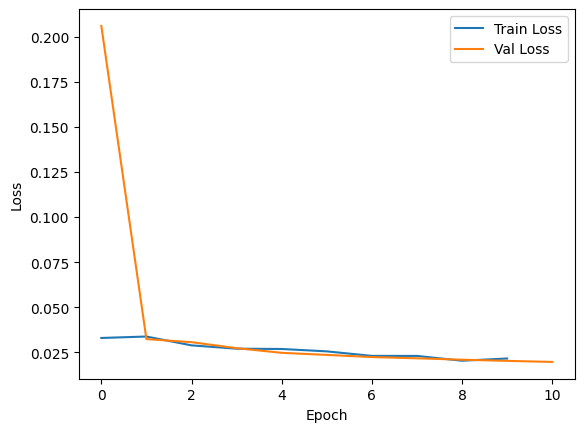

In [55]:
plt.plot(ae_trainer.train_losses, label='Train Loss')
plt.plot(ae_trainer.val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate on Testset

In [56]:
test_ae(autoencoder, test_loader, nn.MSELoss(), device)

0.01964526949397155

## Visualize Model Output (8 points)


##### For each category in the test set:

1. Randomly select an image from that category.
2. Generate a reconstruction of the image.
3. Display the original image and its reconstruction side-by-side.


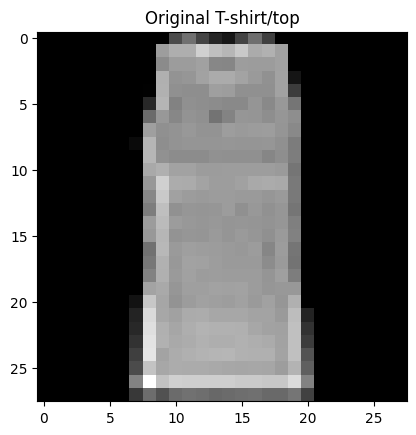

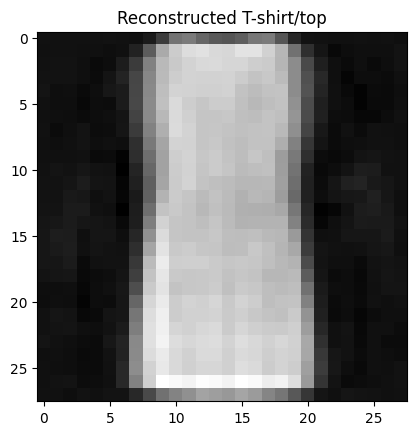

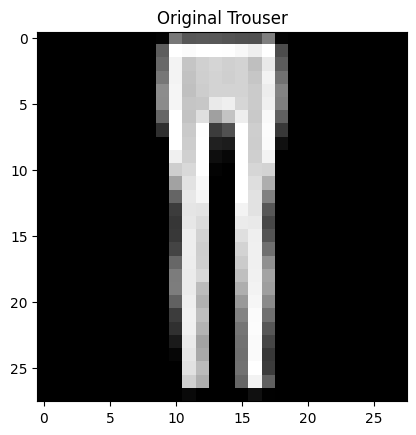

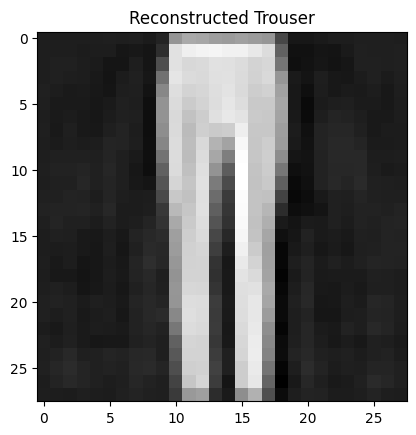

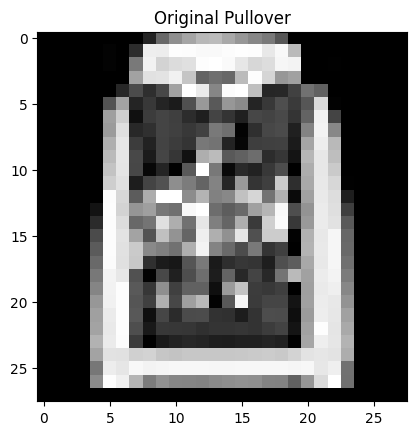

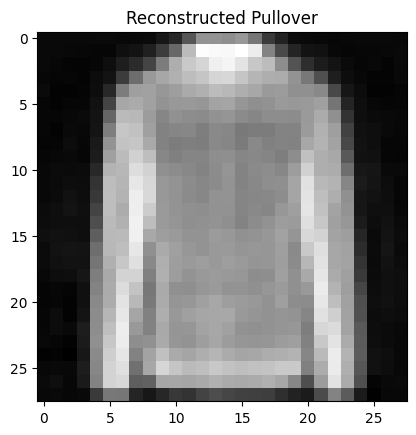

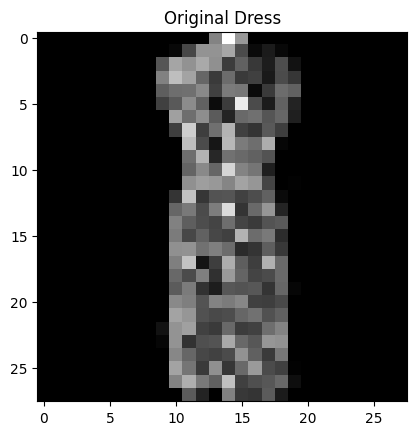

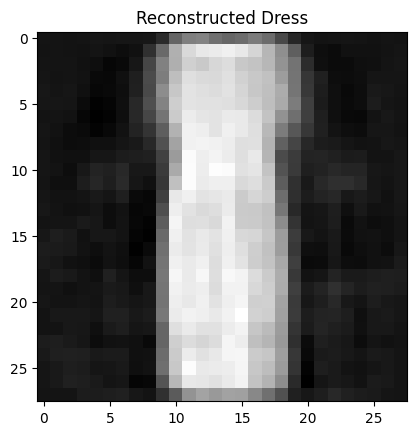

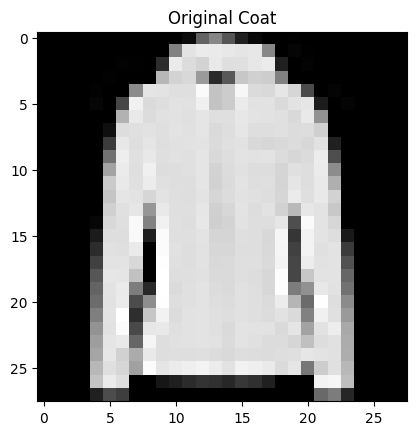

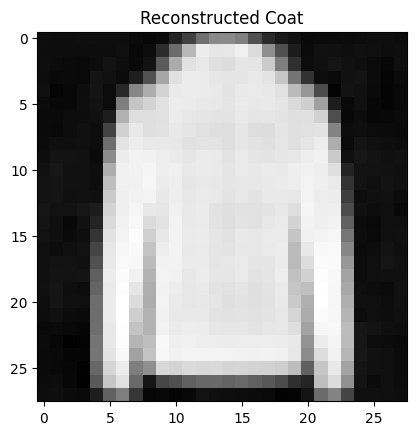

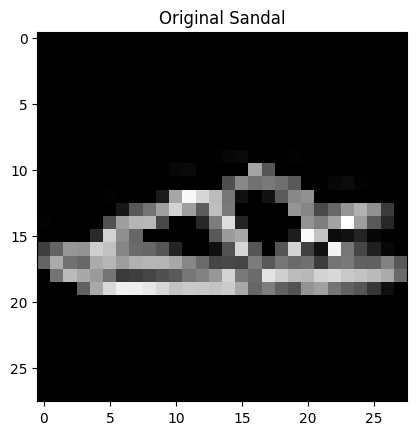

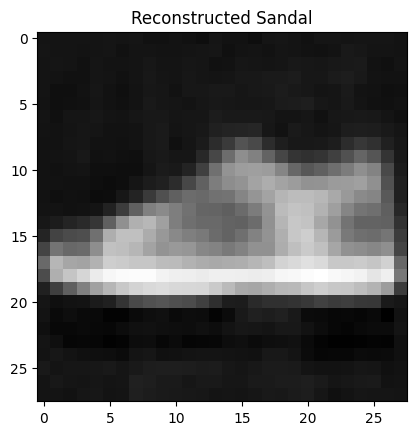

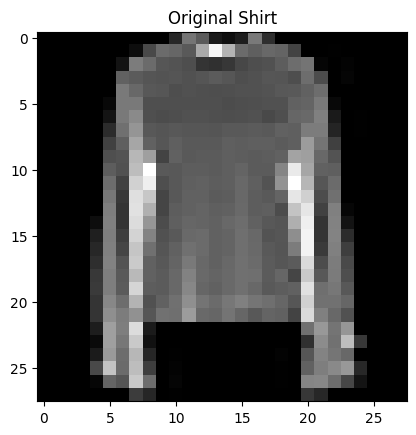

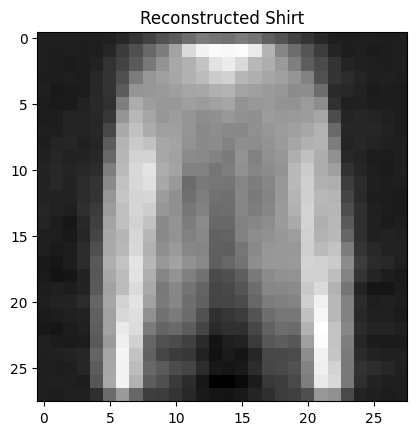

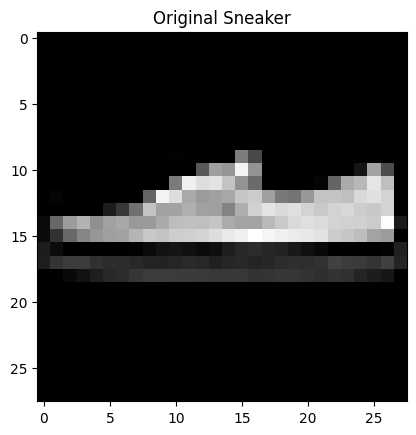

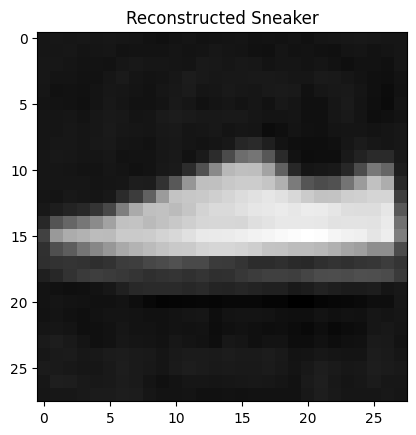

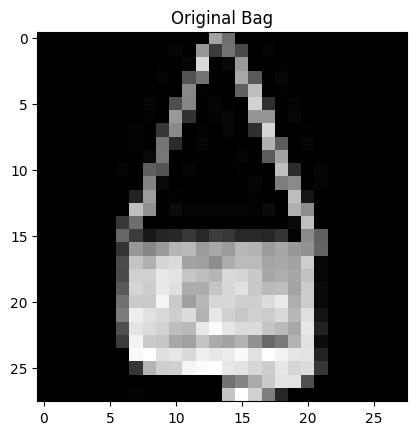

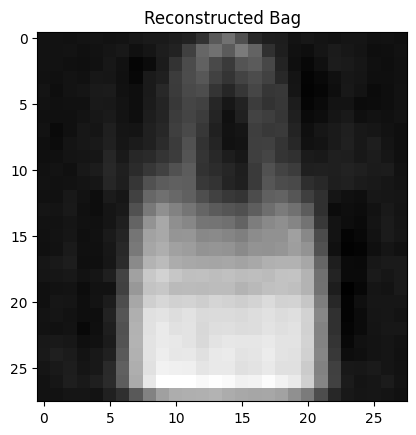

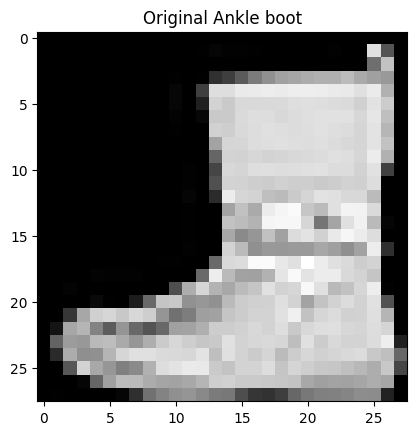

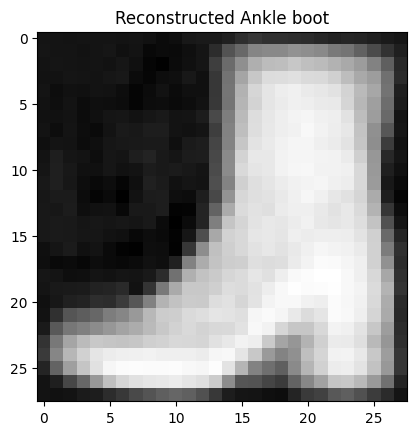

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import torch



def visualize_input_reconstructed(autoencoder, test_loader, device, class_names):
    autoencoder.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = autoencoder(images)
            for i in range(len(class_names)):
                index = (labels == i).nonzero(as_tuple=True)[0][0]
                original = images[index].cpu().numpy().reshape(28, 28)
                reconstructed = outputs[index].cpu().numpy().reshape(28, 28)
                plt.imshow(original, cmap='gray')
                plt.title(f'Original {class_names[i]}')
                plt.show()
                plt.imshow(reconstructed, cmap='gray')
                plt.title(f'Reconstructed {class_names[i]}')
                plt.show()
            break


visualize_input_reconstructed(autoencoder, test_loader, device, class_names)

## Visualize Embeddings (5 points)

Generate image embeddings for the test dataset.

In [58]:
embeddings = []
autoencoder.eval()
with torch.no_grad():
  for images, _ in test_loader:
        images = images.to(device)
        encoded_imgs = autoencoder.encoder(images)
        embeddings.extend(encoded_imgs.view(encoded_imgs.size(0), -1).detach().cpu().numpy())
embeddings = np.array(embeddings)

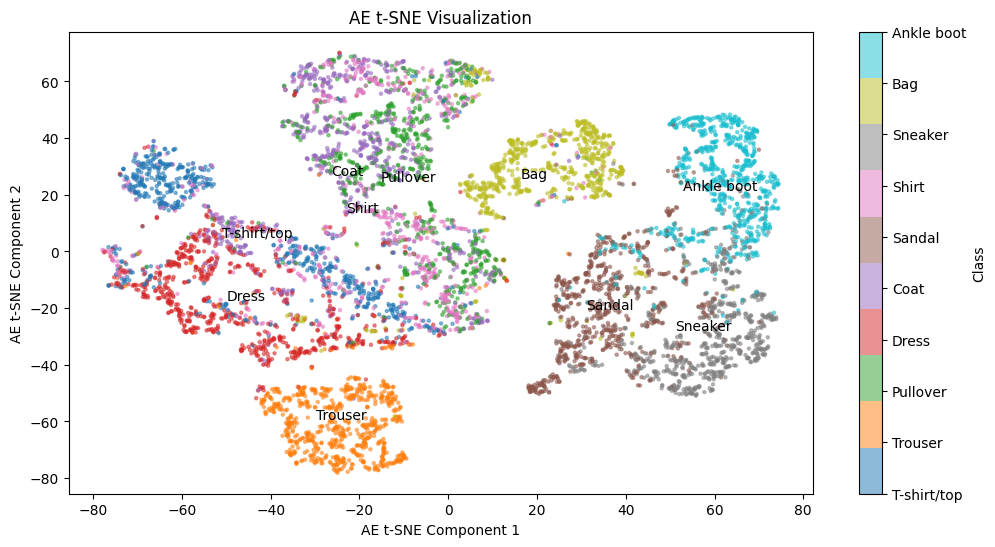

In [59]:
tsne = TSNE(n_components=2, random_state=RANDOM_STATE)
embeddings_tsne = tsne.fit_transform(embeddings)
visualize_2d(embeddings_tsne, y_test, 'AE t-SNE')

# Train a Classifier (8 points)

In the previous part, we saw that the encoder has learned to project images into representations with semantic meaning. In this part, you will transfer the knowledge learned by the encoder to a classification task by adding classification layers on top of it. This is a common technique in transfer learning, and it can be used to improve the performance of a classifier on a new task, even if the classifier is trained on a limited amount of data

In [65]:
def get_encoder():
    encoder = autoencoder.encoder
    return encoder


class Classifier(nn.Module):
    def __init__(self, encoder, num_classes):
        super(Classifier, self).__init__()
        self.encoder = encoder
        self.classifier_layer = nn.Sequential(
            nn.Linear(8, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )


    def forward(self, x):
        x = self.encoder(x)
        x = self.classifier_layer(x)
        return x


encoder = get_encoder()
classifier = Classifier(encoder, 10)
classifier.to(device)

Classifier(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU(inplace=True)
    (8): Linear(in_features=32, out_features=16, bias=True)
    (9): ReLU(inplace=True)
    (10): Linear(in_features=16, out_features=8, bias=True)
  )
  (classifier_layer): Sequential(
    (0): Linear(in_features=8, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)

## Training Loop (9 Points)

Implement the `train_clf_epoch`, `test_clf`, and `train_clf` functions. In the `test_clf` function, in addition to the loss, calculate and return the accuracy.


In [66]:
from torch import optim

def train_clf_epoch(model, train_loader, criterion, optimizer, scheduler, device):
    model.train()
    train_loss = 0.0
    for data, target in train_loader:
        data, target = data.view(data.size(0), -1).to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
    scheduler.step()
    mean_loss = train_loss / len(train_loader.dataset)
    return mean_loss


def test_clf(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.view(data.size(0), -1).to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()*data.size(0)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = correct / total
    mean_loss = test_loss / len(test_loader.dataset)
    return mean_loss, accuracy


def train_clf(model, train_loader, val_loader, num_epochs, device=device):
    learning_rate = 0.001
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
    train_loss_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        train_loss = train_clf_epoch(model, train_loader, criterion, optimizer, scheduler, device)
        val_loss, val_acc = test_clf(model, val_loader, criterion, device)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val ACC: {100 * val_acc:.2f}")

        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

    return train_loss_history, val_loss_history, val_acc_history


clf_train_loss_history, clf_val_loss_history, clf_val_acc_history = train_clf(classifier, train_loader, val_loader, 30)

Epoch 1/30, Train Loss: 0.2880, Val Loss: 0.3153, Val ACC: 88.83
Epoch 2/30, Train Loss: 0.2600, Val Loss: 0.3166, Val ACC: 89.04
Epoch 3/30, Train Loss: 0.2522, Val Loss: 0.3222, Val ACC: 87.98
Epoch 4/30, Train Loss: 0.2462, Val Loss: 0.3205, Val ACC: 88.32
Epoch 5/30, Train Loss: 0.2348, Val Loss: 0.3394, Val ACC: 88.04
Epoch 6/30, Train Loss: 0.2312, Val Loss: 0.3193, Val ACC: 88.68
Epoch 7/30, Train Loss: 0.2237, Val Loss: 0.3224, Val ACC: 88.23
Epoch 8/30, Train Loss: 0.1725, Val Loss: 0.3078, Val ACC: 89.71
Epoch 9/30, Train Loss: 0.1620, Val Loss: 0.3124, Val ACC: 89.48
Epoch 10/30, Train Loss: 0.1570, Val Loss: 0.3225, Val ACC: 89.48
Epoch 11/30, Train Loss: 0.1532, Val Loss: 0.3297, Val ACC: 89.57
Epoch 12/30, Train Loss: 0.1492, Val Loss: 0.3294, Val ACC: 89.48
Epoch 13/30, Train Loss: 0.1460, Val Loss: 0.3345, Val ACC: 89.48
Epoch 14/30, Train Loss: 0.1426, Val Loss: 0.3395, Val ACC: 89.50
Epoch 15/30, Train Loss: 0.1348, Val Loss: 0.3416, Val ACC: 89.35
Epoch 16/30, Train 

## Visualize Losses

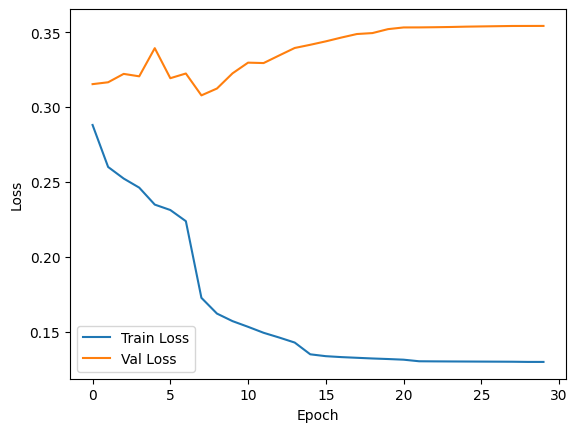

In [67]:
plt.plot(clf_train_loss_history, label='Train Loss')
plt.plot(clf_val_loss_history, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Visualize Validation Accuracy

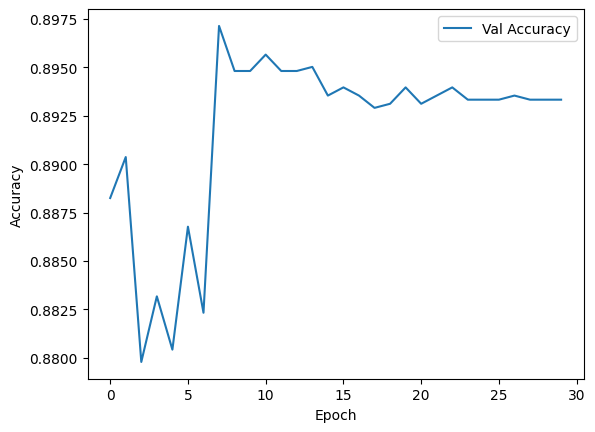

In [68]:
plt.plot(clf_val_acc_history, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluate on Testset (20 points)

Your model must achieve an accuracy of at least 90% on the test set to receive full marks.

In [69]:
test_loss, test_acc = test_clf(classifier, test_loader, nn.CrossEntropyLoss(), device)

print(f"Test Loss: {test_loss:.4f}, Test ACC: {100 * test_acc:.2f}")

Test Loss: 0.3345, Test ACC: 90.01
